In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_1d import ode_y, ode_z
from numba import njit

**ODE of y**:
\begin{align*}
0 = \max_{\tilde{e}} & \min_h -\delta \phi(y) + \delta \eta \log \tilde{e} \\
&+\frac{\xi_m}{2}h^\prime h + \frac{d\phi(y)}{dy}\tilde{e}(\theta + \sigma_y \cdot h) + \frac{1}{2} \frac{d^2 \phi(y)}{(d y)^2}|\sigma_y|^2(\tilde{e})^2\\
&+ (\eta-1)\left[\gamma_1 + \gamma_2 y + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right]\tilde{e}(\theta + \sigma_y \cdot h)
\end{align*}

The FOC of $\tilde{e}$ gives:
$$
\tilde{e}^* = \frac{-B + \sqrt{B^2-4AC}}{2C}
$$

where $A = \delta \eta$, $B = \left(\frac{d\phi}{dy}+(\eta-1)\left[\gamma_1 + \gamma_2 + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right] \right)(\theta+\sigma_y\cdot h)$, $C = \frac{d^2\phi}{dy^2}\sigma_y^2$.

The FOC of $h$ gives:
$$
h^* = -\frac{\left(\frac{d\phi}{dy} + (\eta-1)\left[\gamma_1 + \gamma_2 y + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right]\right)\tilde{e}\sigma_y}{\xi_m}
$$

In [2]:
# Model parameters
η = .032
δ = .01

θ = 1.86/1000.
σ_y = 0.

ξ_m = 1./4000

γ_1 = 1.7675/10000
γ_2 = 0.0022*2
γ_2p = 0.0197*2 # high damage
y_bar = 2.

n_y = 100
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

model_paras = (η, δ, θ, σ_y, ξ_m, γ_1, γ_2, γ_2p, y_bar) 
ϕ, e_tilde = ode_y(y_grid, model_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=2_000)

Iteration 1: LHS Error: 0.001297894311377764; RHS Error 0.0014661421099440202
Iteration 2: LHS Error: 0.001195986429512517; RHS Error 0.0012921141100227036
Iteration 3: LHS Error: 0.0011334658943657119; RHS Error 0.0011994537772048682
Iteration 4: LHS Error: 0.0010893259066419633; RHS Error 0.0011397608471537196
Iteration 5: LHS Error: 0.0010544041826650447; RHS Error 0.0010946264280585858
Iteration 6: LHS Error: 0.001024696423596495; RHS Error 0.0010575711058423516
Iteration 7: LHS Error: 0.0009984449131368771; RHS Error 0.0010258503402762725
Iteration 8: LHS Error: 0.0009747803902078267; RHS Error 0.000998039320044686
Iteration 9: LHS Error: 0.000953724934943008; RHS Error 0.0009732611431791383
Iteration 10: LHS Error: 0.0009337911787333977; RHS Error 0.0009509178439511704
Iteration 11: LHS Error: 0.0009153636450067466; RHS Error 0.0009305671905838874
Iteration 12: LHS Error: 0.0008982280150622666; RHS Error 0.0009118710575621912
Iteration 13: LHS Error: 0.0008822093341727746; RHS Er

Iteration 278: LHS Error: 7.419714406740885e-05; RHS Error 7.410369134458591e-05
Iteration 279: LHS Error: 7.352736605850674e-05; RHS Error 7.343222302694523e-05
Iteration 280: LHS Error: 7.286360346718534e-05; RHS Error 7.276678071263076e-05
Iteration 281: LHS Error: 7.220580183546488e-05; RHS Error 7.210730999927697e-05
Iteration 282: LHS Error: 7.155390719673638e-05; RHS Error 7.145375697050231e-05
Iteration 283: LHS Error: 7.090786607059918e-05; RHS Error 7.08060681911079e-05
Iteration 284: LHS Error: 7.026762545789267e-05; RHS Error 7.016419070231532e-05
Iteration 285: LHS Error: 6.963313283565864e-05; RHS Error 6.952807201706876e-05
Iteration 286: LHS Error: 6.900433615222856e-05; RHS Error 6.889766011540868e-05
Iteration 287: LHS Error: 6.83811838224635e-05; RHS Error 6.827290343990045e-05
Iteration 288: LHS Error: 6.776362472299402e-05; RHS Error 6.76537508911535e-05
Iteration 289: LHS Error: 6.715160818764054e-05; RHS Error 6.704015182336343e-05
Iteration 290: LHS Error: 6.654

Iteration 550: LHS Error: 1.4923649048939613e-05; RHS Error 1.8349213312336948e-05
Iteration 551: LHS Error: 1.4849404092409646e-05; RHS Error 1.8330921169155924e-05
Iteration 552: LHS Error: 1.4775528111327096e-05; RHS Error 1.8312848370337777e-05
Iteration 553: LHS Error: 1.4702019274462352e-05; RHS Error 1.8294992878881405e-05
Iteration 554: LHS Error: 1.4628875759550852e-05; RHS Error 1.8277352675409087e-05
Iteration 555: LHS Error: 1.4556095753445741e-05; RHS Error 1.825992575800841e-05
Iteration 556: LHS Error: 1.4483677452006849e-05; RHS Error 1.8242710142085997e-05
Iteration 557: LHS Error: 1.4411619059975789e-05; RHS Error 1.8225703860212975e-05
Iteration 558: LHS Error: 1.4339918790989836e-05; RHS Error 1.8208904961983252e-05
Iteration 559: LHS Error: 1.4268574867568051e-05; RHS Error 1.819231151386103e-05
Iteration 560: LHS Error: 1.4197585521000256e-05; RHS Error 1.8175921599036663e-05
Iteration 561: LHS Error: 1.412694899136091e-05; RHS Error 1.8159733317281695e-05
Iterati

Iteration 845: LHS Error: 3.4275335225320003e-06; RHS Error 1.7393775280511326e-05
Iteration 846: LHS Error: 3.410481596979875e-06; RHS Error 1.7396085583932608e-05
Iteration 847: LHS Error: 3.3935144239938264e-06; RHS Error 1.7398400865857827e-05
Iteration 848: LHS Error: 3.376631582771572e-06; RHS Error 1.74007209925829e-05
Iteration 849: LHS Error: 3.359832654536987e-06; RHS Error 1.740304583181722e-05
Iteration 850: LHS Error: 3.343117222748271e-06; RHS Error 1.740537525267091e-05
Iteration 851: LHS Error: 3.3264848727787566e-06; RHS Error 1.7407709125640198e-05
Iteration 852: LHS Error: 3.3099351921250797e-06; RHS Error 1.741004732259781e-05
Iteration 853: LHS Error: 3.293467770337788e-06; RHS Error 1.7412389716778612e-05
Iteration 854: LHS Error: 3.277082198938075e-06; RHS Error 1.7414736182769903e-05
Iteration 855: LHS Error: 3.2607780715981916e-06; RHS Error 1.741708659649759e-05
Iteration 856: LHS Error: 3.244554983850012e-06; RHS Error 1.7419440835214975e-05
Iteration 857: LH

Iteration 1143: LHS Error: 7.754609922389077e-07; RHS Error 1.8008933234322903e-05
Iteration 1144: LHS Error: 7.716031499710452e-07; RHS Error 1.8010354663368117e-05
Iteration 1145: LHS Error: 7.677644821846297e-07; RHS Error 1.8011771439449065e-05
Iteration 1146: LHS Error: 7.639448937474258e-07; RHS Error 1.801318357058158e-05
Iteration 1147: LHS Error: 7.601442898463873e-07; RHS Error 1.8014591064839116e-05
Iteration 1148: LHS Error: 7.563625762374571e-07; RHS Error 1.8015993930352325e-05
Iteration 1149: LHS Error: 7.525996591623008e-07; RHS Error 1.8017392175304547e-05
Iteration 1150: LHS Error: 7.48855445251162e-07; RHS Error 1.8018785807933876e-05
Iteration 1151: LHS Error: 7.451298416338847e-07; RHS Error 1.8020174836533428e-05
Iteration 1152: LHS Error: 7.414227559121578e-07; RHS Error 1.802155926944717e-05
Iteration 1153: LHS Error: 7.377340961872703e-07; RHS Error 1.8022939115068613e-05
Iteration 1154: LHS Error: 7.340637708658226e-07; RHS Error 1.8024314381847e-05
Iteration 

Iteration 1437: LHS Error: 1.7897767509711393e-07; RHS Error 1.8266683236008207e-05
Iteration 1438: LHS Error: 1.780872760787089e-07; RHS Error 1.826715003996329e-05
Iteration 1439: LHS Error: 1.7720130254805788e-07; RHS Error 1.8267614916262366e-05
Iteration 1440: LHS Error: 1.763197326615229e-07; RHS Error 1.826807787210676e-05
Iteration 1441: LHS Error: 1.7544254443668805e-07; RHS Error 1.8268538914676118e-05
Iteration 1442: LHS Error: 1.74569716182571e-07; RHS Error 1.8268998051127958e-05
Iteration 1443: LHS Error: 1.7370122623594497e-07; RHS Error 1.8269455288600343e-05
Iteration 1444: LHS Error: 1.7283705303072772e-07; RHS Error 1.826991063420911e-05
Iteration 1445: LHS Error: 1.7197717516737043e-07; RHS Error 1.827036409504971e-05
Iteration 1446: LHS Error: 1.7112157131571326e-07; RHS Error 1.8270815678195912e-05
Iteration 1447: LHS Error: 1.7027022021498528e-07; RHS Error 1.827126539070018e-05
Iteration 1448: LHS Error: 1.694231007848268e-07; RHS Error 1.8271713239595086e-05
It

Iteration 1720: LHS Error: 4.363787306504996e-08; RHS Error 1.8343668071433335e-05
Iteration 1721: LHS Error: 4.342077762620189e-08; RHS Error 1.8343805593132605e-05
Iteration 1722: LHS Error: 4.3204761213111453e-08; RHS Error 1.8343942502783647e-05
Iteration 1723: LHS Error: 4.2989818468952556e-08; RHS Error 1.8344078803003293e-05
Iteration 1724: LHS Error: 4.277594406465468e-08; RHS Error 1.8344214496398724e-05
Iteration 1725: LHS Error: 4.256313271278067e-08; RHS Error 1.834434958556449e-05
Iteration 1726: LHS Error: 4.2351379112015586e-08; RHS Error 1.8344484073088687e-05
Iteration 1727: LHS Error: 4.2140678002677845e-08; RHS Error 1.8344617961546517e-05
Iteration 1728: LHS Error: 4.1931024208352596e-08; RHS Error 1.8344751253502873e-05
Iteration 1729: LHS Error: 4.172241248323605e-08; RHS Error 1.8344883951513114e-05
Iteration 1730: LHS Error: 4.151483766479114e-08; RHS Error 1.8345016058120994e-05
Iteration 1731: LHS Error: 4.1308294604358586e-08; RHS Error 1.8345147575862027e-05

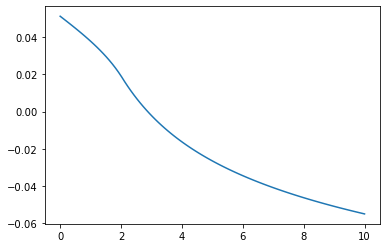

In [5]:
plt.plot(y_grid, ϕ)

**ODE of z**:
$$
0 = \min_h -\delta \eta \log z_2 + \frac{\xi_m}{2}h^\prime h + \frac{d\psi(z_2)}{d z_2}\left[-\rho(z_2-\mu_2) + \sqrt{z_2}\sigma_2 \cdot h\right] + \frac{1}{2}\frac{d^2 \psi(z_2)}{(d z_2)^2}z_2|\sigma_2|^2
$$

The FOC of $h$ gives:
$$
h^* = -\frac{\frac{d\psi(z_2)}{d z_2}\sqrt{z_2}\sigma_2}{\xi_m}
$$

In [10]:
# Model parameters
η = .032
δ = .01

ρ = 0.9
μ_2 = 1.
σ_2 = 0.013145579 / np.sqrt(1.86/1000)

ξ_m = 1000.

n_z = 100
z_min = np.max([μ_2 - 3*np.sqrt(σ_2**2*μ_2/(2*ρ)), 1e-9])
z_max = μ_2 + 3*np.sqrt(σ_2**2*μ_2/(2*ρ))
z_grid = np.linspace(z_min, z_max, n_z)

model_paras = (η, δ, ρ, μ_2, σ_2, ξ_m) 
ψ = ode_z(z_grid, model_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=2_000)

Iteration 1: LHS Error: 0.00040479137003108286; RHS Error 0.0006374361746997154
Iteration 2: LHS Error: 0.00026183650263205327; RHS Error 0.00040480145564217816
Iteration 3: LHS Error: 0.00017258443822324582; RHS Error 0.00026184550119110275
Iteration 4: LHS Error: 0.00011600660034984198; RHS Error 0.000172584109967781
Iteration 5: LHS Error: 7.963645101756217e-05; RHS Error 0.00011600595844048366
Iteration 6: LHS Error: 5.597047382177155e-05; RHS Error 7.964974683015143e-05
Iteration 7: LHS Error: 4.0417620415354565e-05; RHS Error 5.599730893678158e-05
Iteration 8: LHS Error: 3.0072261897231677e-05; RHS Error 4.041970921780008e-05
Iteration 9: LHS Error: 2.3155562249276397e-05; RHS Error 3.0084565463339366e-05
Iteration 10: LHS Error: 1.8503193585263063e-05; RHS Error 2.317477985590489e-05
Iteration 11: LHS Error: 1.534760539430454e-05; RHS Error 1.8511672984357748e-05
Iteration 12: LHS Error: 1.321041828348168e-05; RHS Error 1.536400502906283e-05
Iteration 13: LHS Error: 1.1742003632

Iteration 105: LHS Error: 8.561127829918988e-06; RHS Error 8.56430609075449e-06
Iteration 106: LHS Error: 8.561342103422659e-06; RHS Error 8.565188943672865e-06
Iteration 107: LHS Error: 8.561232414269228e-06; RHS Error 8.567777391666734e-06
Iteration 108: LHS Error: 8.56099238640657e-06; RHS Error 8.567809215290765e-06
Iteration 109: LHS Error: 8.572517270559433e-06; RHS Error 8.567772495076656e-06
Iteration 110: LHS Error: 8.562544358584024e-06; RHS Error 8.56280191370115e-06
Iteration 111: LHS Error: 8.56497828413257e-06; RHS Error 8.562178125750658e-06
Iteration 112: LHS Error: 8.56238544816708e-06; RHS Error 8.561817849336057e-06
Iteration 113: LHS Error: 8.56305290116967e-06; RHS Error 8.561930660007085e-06
Iteration 114: LHS Error: 8.561983285318648e-06; RHS Error 8.562124735571109e-06
Iteration 115: LHS Error: 8.563708114506545e-06; RHS Error 8.562220323594405e-06
Iteration 116: LHS Error: 8.561816297207104e-06; RHS Error 8.562492493288728e-06
Iteration 117: LHS Error: 8.561396

Iteration 209: LHS Error: 8.56468346589884e-06; RHS Error 8.56272603600885e-06
Iteration 210: LHS Error: 8.561775410375803e-06; RHS Error 8.563035728297619e-06
Iteration 211: LHS Error: 8.563973376571815e-06; RHS Error 8.5617148216726e-06
Iteration 212: LHS Error: 8.561633111276107e-06; RHS Error 8.561819058285647e-06
Iteration 213: LHS Error: 8.56160410213293e-06; RHS Error 8.56314509051803e-06
Iteration 214: LHS Error: 8.572627181142048e-06; RHS Error 8.571018937139803e-06
Iteration 215: LHS Error: 8.567045128640707e-06; RHS Error 8.56197150847084e-06
Iteration 216: LHS Error: 8.565259157423952e-06; RHS Error 8.56267477673021e-06
Iteration 217: LHS Error: 8.56183098554516e-06; RHS Error 8.562826912033283e-06
Iteration 218: LHS Error: 8.56115860907588e-06; RHS Error 8.561934812570622e-06
Iteration 219: LHS Error: 8.562775437171224e-06; RHS Error 8.561952087038923e-06
Iteration 220: LHS Error: 8.561330904588264e-06; RHS Error 8.573400253551657e-06
Iteration 221: LHS Error: 8.5717759094

Iteration 325: LHS Error: 8.5624408331271e-06; RHS Error 8.639051283090631e-06
Iteration 326: LHS Error: 8.568643807607516e-06; RHS Error 8.635004149161864e-06
Iteration 327: LHS Error: 8.567656368386415e-06; RHS Error 8.610841483550904e-06
Iteration 328: LHS Error: 8.568011947705659e-06; RHS Error 8.597561228546437e-06
Iteration 329: LHS Error: 8.56609963581197e-06; RHS Error 8.62014827786924e-06
Iteration 330: LHS Error: 8.5752541062762e-06; RHS Error 8.604301434356047e-06
Iteration 331: LHS Error: 8.564742585784497e-06; RHS Error 8.636465464713827e-06
Iteration 332: LHS Error: 8.561701129924763e-06; RHS Error 8.631157420436976e-06
Iteration 333: LHS Error: 8.561243194630912e-06; RHS Error 8.626714471164545e-06
Iteration 334: LHS Error: 8.56608638037876e-06; RHS Error 8.625509654778998e-06
Iteration 335: LHS Error: 8.571502030663104e-06; RHS Error 8.611463871417626e-06
Iteration 336: LHS Error: 8.56485982434125e-06; RHS Error 8.63704928088572e-06
Iteration 337: LHS Error: 8.564005741

Iteration 446: LHS Error: 8.592328368122164e-06; RHS Error 8.651055783268449e-06
Iteration 447: LHS Error: 8.594002337553985e-06; RHS Error 8.586897908389503e-06
Iteration 448: LHS Error: 8.580618610479901e-06; RHS Error 8.660589609672028e-06
Iteration 449: LHS Error: 8.563128923646125e-06; RHS Error 8.622350999097693e-06
Iteration 450: LHS Error: 8.588225913008698e-06; RHS Error 8.627902632952252e-06
Iteration 451: LHS Error: 8.566500378766849e-06; RHS Error 8.666552524350547e-06
Iteration 452: LHS Error: 8.571537406350076e-06; RHS Error 8.641753167655563e-06
Iteration 453: LHS Error: 8.588743733199504e-06; RHS Error 8.633019534545609e-06
Iteration 454: LHS Error: 8.565246878097267e-06; RHS Error 8.671109558227642e-06
Iteration 455: LHS Error: 8.570822848880458e-06; RHS Error 8.651159666500706e-06
Iteration 456: LHS Error: 8.566487134712125e-06; RHS Error 8.629755836034726e-06
Iteration 457: LHS Error: 8.573731125856472e-06; RHS Error 8.648878961681368e-06
Iteration 458: LHS Error: 8.

Iteration 560: LHS Error: 8.604353214499913e-06; RHS Error 8.727185459729916e-06
Iteration 561: LHS Error: 8.567483220423e-06; RHS Error 8.629562616849988e-06
Iteration 562: LHS Error: 8.573777280233667e-06; RHS Error 8.636641573820508e-06
Iteration 563: LHS Error: 8.57561501448837e-06; RHS Error 8.620013547838722e-06
Iteration 564: LHS Error: 8.579278089255928e-06; RHS Error 8.621220954266708e-06
Iteration 565: LHS Error: 8.571668234852187e-06; RHS Error 8.643355902082997e-06
Iteration 566: LHS Error: 8.575803454195785e-06; RHS Error 8.648346192833287e-06
Iteration 567: LHS Error: 8.571987920809581e-06; RHS Error 8.662065305889812e-06
Iteration 568: LHS Error: 8.577881371328415e-06; RHS Error 8.702484567713238e-06
Iteration 569: LHS Error: 8.574512346952098e-06; RHS Error 8.649891357808694e-06
Iteration 570: LHS Error: 8.59364169412697e-06; RHS Error 8.635174891245584e-06
Iteration 571: LHS Error: 8.589814871545493e-06; RHS Error 8.679980135848449e-06
Iteration 572: LHS Error: 8.57249

Iteration 680: LHS Error: 8.576030514958338e-06; RHS Error 8.665365330807746e-06
Iteration 681: LHS Error: 8.591188526243729e-06; RHS Error 8.686119807831886e-06
Iteration 682: LHS Error: 8.563347038281419e-06; RHS Error 8.721397071809027e-06
Iteration 683: LHS Error: 8.568355153368117e-06; RHS Error 8.72792362107479e-06
Iteration 684: LHS Error: 8.569537625898599e-06; RHS Error 8.716880270354414e-06
Iteration 685: LHS Error: 8.573585379435464e-06; RHS Error 8.713282595648145e-06
Iteration 686: LHS Error: 8.5698245400204e-06; RHS Error 8.722603221417928e-06
Iteration 687: LHS Error: 8.579810738621949e-06; RHS Error 8.725338981889442e-06
Iteration 688: LHS Error: 8.567255488672008e-06; RHS Error 8.696584062731433e-06
Iteration 689: LHS Error: 8.632815969312688e-06; RHS Error 8.700559201417588e-06
Iteration 690: LHS Error: 8.597668059081957e-06; RHS Error 8.61375275670916e-06
Iteration 691: LHS Error: 8.582279344925697e-06; RHS Error 8.678737628225346e-06
Iteration 692: LHS Error: 8.5876

Iteration 801: LHS Error: 8.58068239621354e-06; RHS Error 8.6657046929754e-06
Iteration 802: LHS Error: 8.572806877318526e-06; RHS Error 8.648927892820782e-06
Iteration 803: LHS Error: 8.600345655029006e-06; RHS Error 8.659968462156878e-06
Iteration 804: LHS Error: 8.567327691211962e-06; RHS Error 8.701007894965453e-06
Iteration 805: LHS Error: 8.60146019572832e-06; RHS Error 8.697872141835532e-06
Iteration 806: LHS Error: 8.580894970523258e-06; RHS Error 8.732910025675323e-06
Iteration 807: LHS Error: 8.59139822272266e-06; RHS Error 8.741718645438612e-06
Iteration 808: LHS Error: 8.651841772530297e-06; RHS Error 8.690855858233188e-06
Iteration 809: LHS Error: 8.575582024722937e-06; RHS Error 8.622043400871777e-06
Iteration 810: LHS Error: 8.612762501344906e-06; RHS Error 8.648603396988559e-06
Iteration 811: LHS Error: 8.56952116490197e-06; RHS Error 8.702250701797401e-06
Iteration 812: LHS Error: 8.593513478066805e-06; RHS Error 8.679325727761593e-06
Iteration 813: LHS Error: 8.588467

Iteration 926: LHS Error: 8.619953077654632e-06; RHS Error 8.612046615960839e-06
Iteration 927: LHS Error: 8.585749681181039e-06; RHS Error 8.6897074994363e-06
Iteration 928: LHS Error: 8.58981501578645e-06; RHS Error 8.64549485970963e-06
Iteration 929: LHS Error: 8.617835461315407e-06; RHS Error 8.615201557608072e-06
Iteration 930: LHS Error: 8.625380166766942e-06; RHS Error 8.699271687268202e-06
Iteration 931: LHS Error: 8.608753454656531e-06; RHS Error 8.622964855640005e-06
Iteration 932: LHS Error: 8.563833968771271e-06; RHS Error 8.677970683159948e-06
Iteration 933: LHS Error: 8.610255477202802e-06; RHS Error 8.669769551515822e-06
Iteration 934: LHS Error: 8.606022672848386e-06; RHS Error 8.759164086543454e-06
Iteration 935: LHS Error: 8.640137954056895e-06; RHS Error 8.644817130116589e-06
Iteration 936: LHS Error: 8.572440985028101e-06; RHS Error 8.685445215028285e-06
Iteration 937: LHS Error: 8.599725554292621e-06; RHS Error 8.664745779125437e-06
Iteration 938: LHS Error: 8.6406

Iteration 1047: LHS Error: 8.625525081072324e-06; RHS Error 8.70582359037593e-06
Iteration 1048: LHS Error: 8.647159545247321e-06; RHS Error 8.75031153737925e-06
Iteration 1049: LHS Error: 8.603387665308965e-06; RHS Error 8.630044501121298e-06
Iteration 1050: LHS Error: 8.61982947658168e-06; RHS Error 8.620659620263448e-06
Iteration 1051: LHS Error: 8.609171039781864e-06; RHS Error 8.687227761913774e-06
Iteration 1052: LHS Error: 8.565484257550167e-06; RHS Error 8.717691229079283e-06
Iteration 1053: LHS Error: 8.56624829027007e-06; RHS Error 8.743545381881713e-06
Iteration 1054: LHS Error: 8.587694817725929e-06; RHS Error 8.781465706373661e-06
Iteration 1055: LHS Error: 8.606445695395065e-06; RHS Error 8.739475895300393e-06
Iteration 1056: LHS Error: 8.570563473251844e-06; RHS Error 8.768742658072986e-06
Iteration 1057: LHS Error: 8.571742581403238e-06; RHS Error 8.742544335574721e-06
Iteration 1058: LHS Error: 8.584546111438038e-06; RHS Error 8.734614613513663e-06
Iteration 1059: LHS 

Iteration 1171: LHS Error: 8.565682471001895e-06; RHS Error 8.795286342878851e-06
Iteration 1172: LHS Error: 8.57859965629204e-06; RHS Error 8.759559236760635e-06
Iteration 1173: LHS Error: 8.586641400413347e-06; RHS Error 8.735805944495606e-06
Iteration 1174: LHS Error: 8.629340423203097e-06; RHS Error 8.767144113578512e-06
Iteration 1175: LHS Error: 8.573684960523631e-06; RHS Error 8.695289908670282e-06
Iteration 1176: LHS Error: 8.615541265867208e-06; RHS Error 8.691062222267773e-06
Iteration 1177: LHS Error: 8.573815542744015e-06; RHS Error 8.751841869839559e-06
Iteration 1178: LHS Error: 8.666032253395323e-06; RHS Error 8.748958869527227e-06
Iteration 1179: LHS Error: 8.623543839394662e-06; RHS Error 8.650606914838935e-06
Iteration 1180: LHS Error: 8.59823094265591e-06; RHS Error 8.72560528802132e-06
Iteration 1181: LHS Error: 8.577821099997954e-06; RHS Error 8.749014746548336e-06
Iteration 1182: LHS Error: 8.664905261581216e-06; RHS Error 8.751335704743285e-06
Iteration 1183: LHS

Iteration 1290: LHS Error: 8.600618700947346e-06; RHS Error 8.730178198552681e-06
Iteration 1291: LHS Error: 8.605096474167268e-06; RHS Error 8.744470553087905e-06
Iteration 1292: LHS Error: 8.582317143490323e-06; RHS Error 8.684378101230677e-06
Iteration 1293: LHS Error: 8.682332019054051e-06; RHS Error 8.707941061653188e-06
Iteration 1294: LHS Error: 8.647131251818957e-06; RHS Error 8.598637119087104e-06
Iteration 1295: LHS Error: 8.655754966687898e-06; RHS Error 8.694370470587701e-06
Iteration 1296: LHS Error: 8.578538309721856e-06; RHS Error 8.756839090569009e-06
Iteration 1297: LHS Error: 8.592093149465546e-06; RHS Error 8.721237898323653e-06
Iteration 1298: LHS Error: 8.66391238212548e-06; RHS Error 8.743206189513997e-06
Iteration 1299: LHS Error: 8.564882020688225e-06; RHS Error 8.650141797675944e-06
Iteration 1300: LHS Error: 8.619200084675899e-06; RHS Error 8.680524878701759e-06
Iteration 1301: LHS Error: 8.692161160185272e-06; RHS Error 8.723113812311224e-06
Iteration 1302: L

Iteration 1417: LHS Error: 8.663816364660668e-06; RHS Error 8.662012411665004e-06
Iteration 1418: LHS Error: 8.632238795441491e-06; RHS Error 8.763252127716827e-06
Iteration 1419: LHS Error: 8.620803397803994e-06; RHS Error 8.755269119434142e-06
Iteration 1420: LHS Error: 8.609306179399243e-06; RHS Error 8.744530345814719e-06
Iteration 1421: LHS Error: 8.569679457172755e-06; RHS Error 8.769363575486283e-06
Iteration 1422: LHS Error: 8.765552147809233e-06; RHS Error 8.747160406406883e-06
Iteration 1423: LHS Error: 8.587418409334094e-06; RHS Error 8.605358205371333e-06
Iteration 1424: LHS Error: 8.657983006688658e-06; RHS Error 8.631736670284228e-06
Iteration 1425: LHS Error: 8.63914485453067e-06; RHS Error 8.615027671698982e-06
Iteration 1426: LHS Error: 8.714690029831829e-06; RHS Error 8.749871314073742e-06
Iteration 1427: LHS Error: 8.618033733864827e-06; RHS Error 8.574392132788198e-06
Iteration 1428: LHS Error: 8.6242475131771e-06; RHS Error 8.656340806154734e-06
Iteration 1429: LHS

Iteration 1545: LHS Error: 8.681434731388007e-06; RHS Error 8.573828843462994e-06
Iteration 1546: LHS Error: 8.6249187919267e-06; RHS Error 8.62264827534504e-06
Iteration 1547: LHS Error: 8.627119434849798e-06; RHS Error 8.639956625799635e-06
Iteration 1548: LHS Error: 8.602467603207806e-06; RHS Error 8.676324701577362e-06
Iteration 1549: LHS Error: 8.6070788349428e-06; RHS Error 8.704359081469965e-06
Iteration 1550: LHS Error: 8.568537619794633e-06; RHS Error 8.650472602127375e-06
Iteration 1551: LHS Error: 8.691101028938594e-06; RHS Error 8.649237556693668e-06
Iteration 1552: LHS Error: 8.629026845884472e-06; RHS Error 8.6265921036315e-06
Iteration 1553: LHS Error: 8.641277692350222e-06; RHS Error 8.632440242353594e-06
Iteration 1554: LHS Error: 8.628641554481523e-06; RHS Error 8.674264366562569e-06
Iteration 1555: LHS Error: 8.594749313799166e-06; RHS Error 8.716436266707468e-06
Iteration 1556: LHS Error: 8.59145784723632e-06; RHS Error 8.732753786244371e-06
Iteration 1557: LHS Erro

Iteration 1671: LHS Error: 8.691840957607277e-06; RHS Error 8.648386794439728e-06
Iteration 1672: LHS Error: 8.572726785401052e-06; RHS Error 8.769144819733839e-06
Iteration 1673: LHS Error: 8.815620690346901e-06; RHS Error 8.757142044082847e-06
Iteration 1674: LHS Error: 8.671820826330542e-06; RHS Error 8.611385127486274e-06
Iteration 1675: LHS Error: 8.704823352323823e-06; RHS Error 8.648317684824372e-06
Iteration 1676: LHS Error: 8.781142072892753e-06; RHS Error 8.722509064706339e-06
Iteration 1677: LHS Error: 8.643315533974835e-06; RHS Error 8.634880241495076e-06
Iteration 1678: LHS Error: 8.60762132693163e-06; RHS Error 8.61636564865472e-06
Iteration 1679: LHS Error: 8.635334920202575e-06; RHS Error 8.57670615010209e-06
Iteration 1680: LHS Error: 8.5776575377422e-06; RHS Error 8.599899851899839e-06
Iteration 1681: LHS Error: 8.636643632814814e-06; RHS Error 8.629247148044992e-06
Iteration 1682: LHS Error: 8.57139134533523e-06; RHS Error 8.69371617657805e-06
Iteration 1683: LHS Err

Iteration 1801: LHS Error: 8.617161296084822e-06; RHS Error 8.5764331371165e-06
Iteration 1802: LHS Error: 8.788120622006332e-06; RHS Error 8.674322563830266e-06
Iteration 1803: LHS Error: 8.660179177822497e-06; RHS Error 8.695966067412669e-06
Iteration 1804: LHS Error: 8.647847607153383e-06; RHS Error 8.656891157939685e-06
Iteration 1805: LHS Error: 8.58055390712091e-06; RHS Error 8.588908952321904e-06
Iteration 1806: LHS Error: 8.574477189778051e-06; RHS Error 8.677052665933638e-06
Iteration 1807: LHS Error: 8.732802201226464e-06; RHS Error 8.683765058555676e-06
Iteration 1808: LHS Error: 8.595368541988724e-06; RHS Error 8.67903075007633e-06
Iteration 1809: LHS Error: 8.620932505946574e-06; RHS Error 8.581818748721725e-06
Iteration 1810: LHS Error: 8.623556813178168e-06; RHS Error 8.674041144355249e-06
Iteration 1811: LHS Error: 8.683876528007076e-06; RHS Error 8.636389840043239e-06
Iteration 1812: LHS Error: 8.645597394048993e-06; RHS Error 8.737665947244379e-06
Iteration 1813: LHS 

Iteration 1931: LHS Error: 8.66066274513369e-06; RHS Error 8.596843380742722e-06
Iteration 1932: LHS Error: 8.666132485030814e-06; RHS Error 8.64820471608034e-06
Iteration 1933: LHS Error: 8.805097246235988e-06; RHS Error 8.77655052665112e-06
Iteration 1934: LHS Error: 8.620313904203827e-06; RHS Error 8.593126232049028e-06
Iteration 1935: LHS Error: 8.702621140568856e-06; RHS Error 8.617361640501713e-06
Iteration 1936: LHS Error: 8.725673962820674e-06; RHS Error 8.608517124081088e-06
Iteration 1937: LHS Error: 8.817124300571078e-06; RHS Error 8.684671453148846e-06
Iteration 1938: LHS Error: 8.6636772969155e-06; RHS Error 8.642645935148742e-06
Iteration 1939: LHS Error: 8.622604085132407e-06; RHS Error 8.621151013612366e-06
Iteration 1940: LHS Error: 8.682627920027913e-06; RHS Error 8.723535161045284e-06
Iteration 1941: LHS Error: 8.739975098624037e-06; RHS Error 8.814329075285034e-06
Iteration 1942: LHS Error: 8.585251495035057e-06; RHS Error 8.664242246249885e-06
Iteration 1943: LHS E

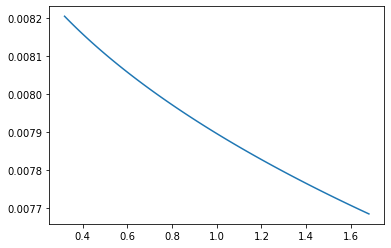

In [11]:
plt.plot(z_grid, ψ)